In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from optimizer import FW
from utils import process_dataset

In [59]:
def plot_hisotry(df, seed, ssc=False):
    """The function to plot the history of the specific run of the algorithm based on seed.
    The plots the ssc=True plot the dashed line for the run with SSC procedure."""
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex='col', sharey='row')
    dfs = df[df.seed==seed]
    assert len(dfs) > 0, "The dataframe is empty. Probably the seed doesn't exist"
    for i in range(2):
        for j in range(2):
            ax = axes[j, i]
            x = 'cpu_time' if i == 0 else 'iteration'
            y = 'of_value' if j == 0 else 'duality_gap'
            x_name = 'CPU time' if i == 0 else 'Iterations'
            y_name = 'O.F. value' if j == 0 else 'Duality Gap'
            if ssc:
                sns.lineplot(data=dfs, x=x, y=y, hue='Variant', style='SSC', ax=ax)
            else:
                sns.lineplot(data=dfs, x=x, y=y, hue='Variant', ax=ax)
            ax.set_yscale('log')
            ax.spines[['right', 'top']].set_visible(False)
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            ax.set_ylabel(y_name)
            ax.set_xlabel(x_name)
    if ssc:
        fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False)
        fig.suptitle('Performance of FW variants with and without SSC procedure', fontsize=14, y=1)
    else:
        fig.legend(handles, labels, title='Variants', loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False)
        fig.suptitle('Performance of FW variants', fontsize=14, y=1)

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Armijo line search

## Instance 1: Johnson8-2-4

In [2]:
dataset = "instances/johnson8-2-4.clq.txt"
n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(28, 10185, 10290)

In [60]:
variants = ["FW", "AFW", "PFW", "BPFW"]
df = pd.DataFrame()

for seed in range(50):
    print(seed)
    for variant in variants:
        fw = FW(variant=variant, 
                stepsize_strategy = 'armijo', 
                ssc_procedure=False)
        fw.optimize(complement_hyperedges, n, seed=seed)
        df_current = pd.DataFrame(fw.history)
        df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
        df_current['seed'] = pd.Series([seed] * len(df_current))

        max_clique = (fw.x > 0.001).sum()
        df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
        df = pd.concat([df, df_current])

0
1
2
3
4
5
6
7
global step
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
global step
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
global step
41
42
global step
43
44
45
46
global step
47
48
global step
49


### Aggregated results over 50 runs

In [54]:
df_final = df[['Variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'seed']).max().reset_index()
df_final[['Variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant']).agg(['max','mean', 'std'])

iteration                    cpu_time                     max_clique   
              max   mean        std       max      mean       std        max   
Variant                                                                        
AFW            47   42.9   3.107339  1.627277  1.155174  0.265158          6  \
BPFW           44   37.8   3.119829  1.166715  0.852938  0.159098          6   
FW            170  120.7  28.402073  9.389072  6.710205  1.621547          6   
PFW            44   37.8   3.119829  1.082894  0.889868  0.136663          6   

                        
        mean       std  
Variant                 
AFW      6.0  0.000000  
BPFW     5.9  0.316228  
FW       6.0  0.000000  
PFW      5.9  0.316228

### Plotting the results for some seed

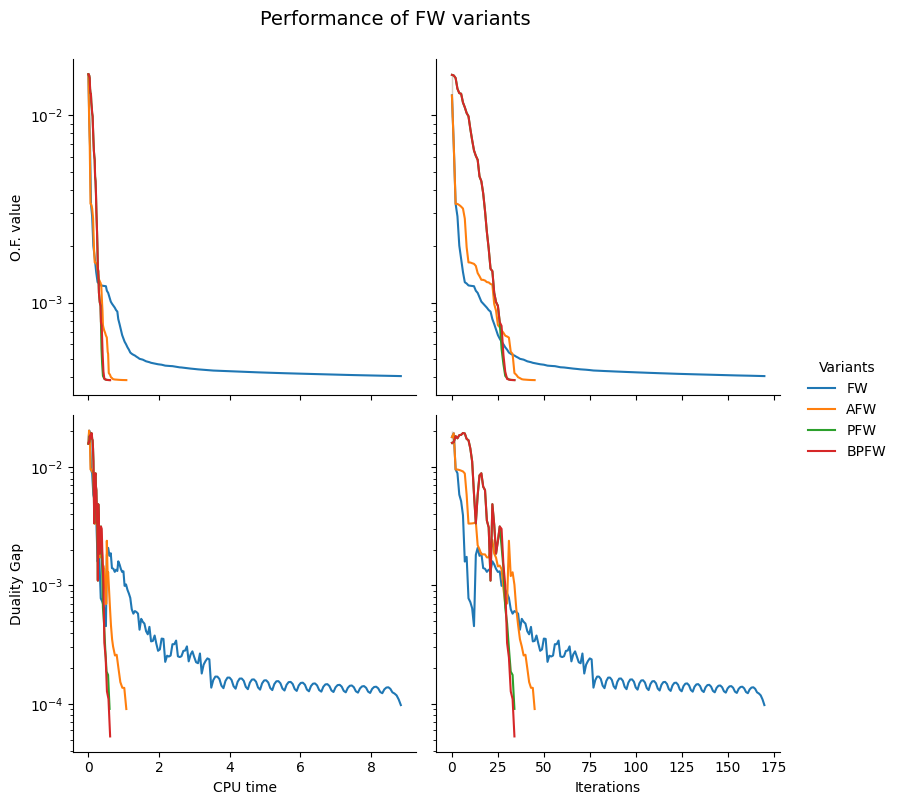

In [58]:
plot_hisotry(df, 7)

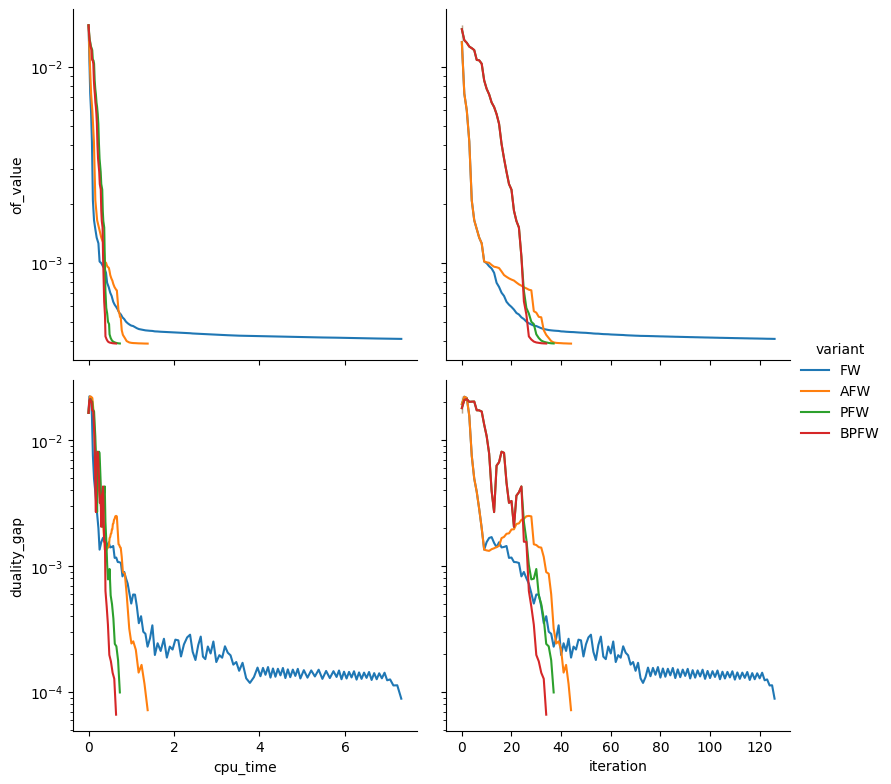

In [5]:
g = sns.PairGrid(df[df.seed == 48], y_vars=['of_value', 'duality_gap'], x_vars=["cpu_time", "iteration"], hue='variant', height=4)
g.map(sns.lineplot)
g.set(yscale="log")
g.add_legend();

## Instance 2: Hamming6-2

In [24]:
dataset = "instances/hamming6-2.clq.txt"
tolerance = 1e-6

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 61776, 573600)

In [25]:
variants = ["FW", "AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(10):
    for variant in variants:
        print(seed, variant)
        fw = FW(variant=variant, ssc_procedure=False, stepsize_strategy='armijo', tolerance=tolerance)
        fw.optimize(complement_hyperedges, n, seed=seed)

        # save the results into a dataframe
        df_current = pd.DataFrame(fw.history)
        df_current['variant'] = pd.Series([fw.variant] * len(df_current))
        df_current['seed'] = pd.Series([seed] * len(df_current))
        max_clique = (fw.x > 0.001).sum()
        df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
        df = pd.concat([df, df_current])

0 FW


KeyboardInterrupt: 

### Aggregated resuts over 10 runs

In [9]:
df_final = df[['variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'seed']).max().reset_index()
df_final[['variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant']).agg(['max','mean', 'std'])

iteration                      cpu_time                        
              max   mean         std        max       mean       std   
variant                                                                
AFW           125  113.4   11.520031   2.346836   2.016732  0.298417  \
BPFW          101   96.0    4.294700   2.032633   1.433187  0.293381   
FW           1014  802.6  107.860198  45.636669  33.184988  5.732718   
PFW           114  100.0    8.576454   2.170241   1.473853  0.340273   

        max_clique                  
               max  mean       std  
variant                             
AFW             28  26.2  1.751190  
BPFW            28  25.7  1.337494  
FW              28  25.7  1.159502  
PFW             28  25.7  1.337494

### Plotting the results for some seed

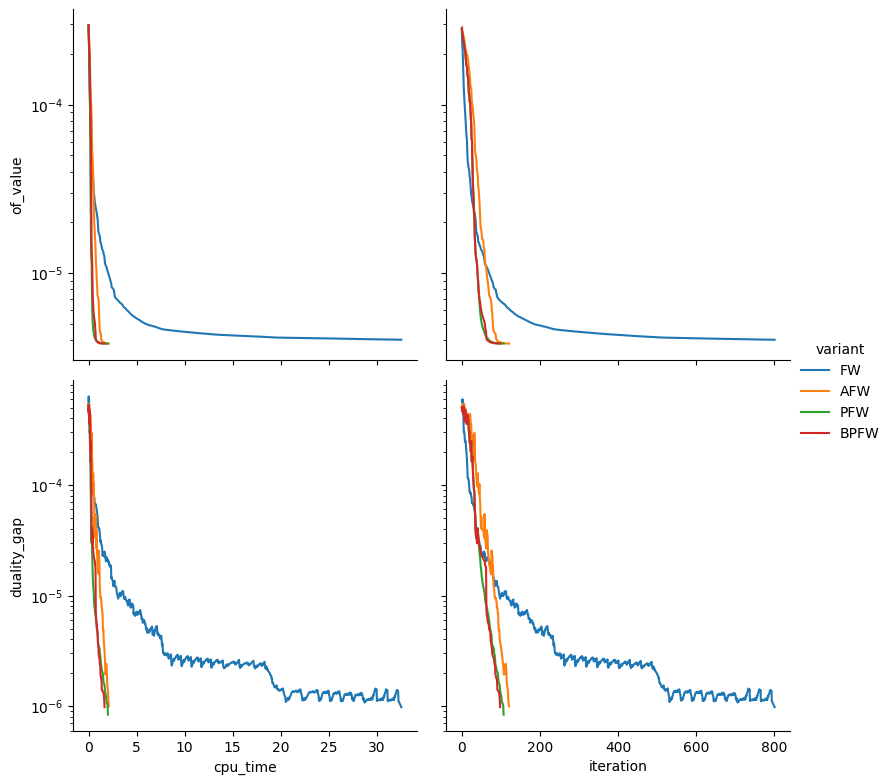

In [14]:
g = sns.PairGrid(df[df.seed == 5], y_vars=['of_value', 'duality_gap'], x_vars=["cpu_time", "iteration"], hue='variant', height=4)
g.map(sns.lineplot)
g.set(yscale="log")
g.add_legend();
g.ylabel("")
#plt.title("FW variants CPU time and iterations VS duality gap and o.f. value");

# SSC procedure with backtracking line search

## Instance 1: Johnson8-2-4

In [36]:
dataset = "instances/johnson8-2-4.clq.txt"
n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(28, 10185, 10290)

In [37]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(50):
    print(seed)
    for variant in variants:
        for ssc in [True, False]:
            fw = FW(variant=variant, 
                    stepsize_strategy = 'backtracking', 
                    ssc_procedure=ssc,
                    linesearch_args={'L': 0.01})
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))

            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

0
1
2
3
4
5
6
global step
7
global step
8
9
global step
10
11
12
13
14
15
16
17
18
19
20
21
22
23
global step
24
25
26
27
28
29
30
31
32
33
global step
34
35
global step
36
37
38
39
global step
40
global step
41
42
global step
43
44
45
46
global step
47
48
global step
49


In [38]:
df_final = df[['Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC', 'seed']).max().reset_index()
df_final[['Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC']).agg(['max','mean', 'std'])

iteration                    cpu_time                       
                    max   mean        std       max      mean       std   
Variant SSC                                                               
AFW     False        86  55.60  11.724734  1.203266  0.795499  0.189250  \
        True         19  15.40   1.905952  1.137395  0.736860  0.167355   
BPFW    False        78  50.16  10.960709  1.026868  0.712979  0.146569   
        True         17  13.04   2.079639  0.950031  0.632584  0.126348   
PFW     False        78  50.18  10.981785  1.114256  0.708451  0.168512   
        True         17  13.12   2.096060  0.930110  0.620576  0.115857   

              max_clique                  
                     max  mean       std  
Variant SSC                               
AFW     False          6  5.98  0.141421  
        True           7  6.02  0.141421  
BPFW    False          6  5.98  0.141421  
        True           6  5.86  0.350510  
PFW     False          6  5.98  0.141421  
        True           6  5.86  0.350510

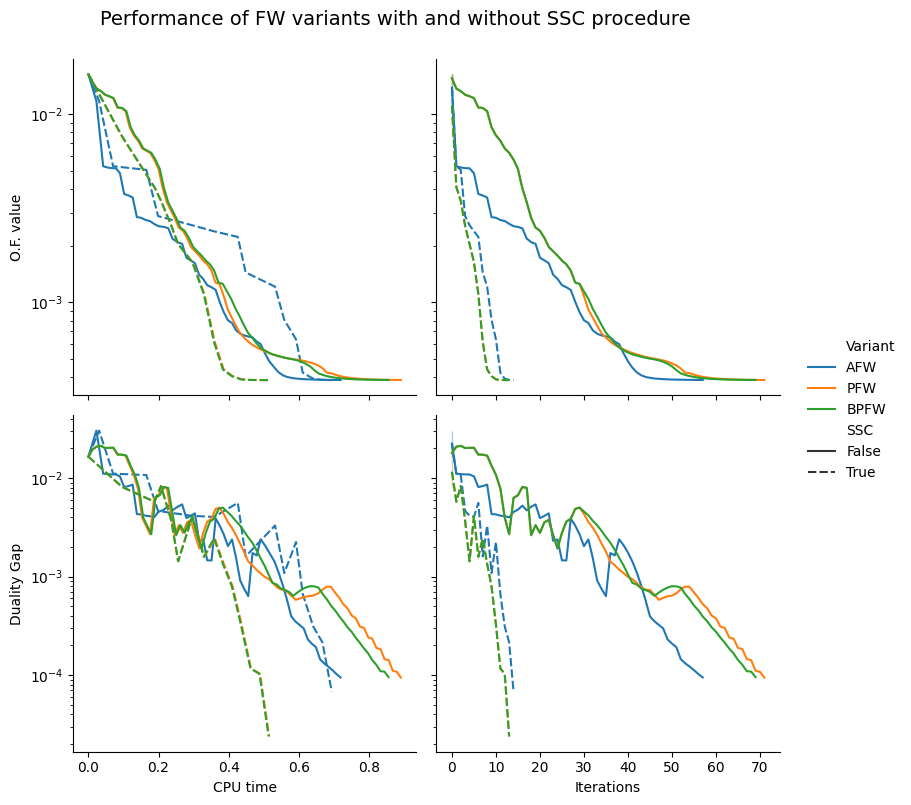

In [40]:
plot_hisotry(df, 48, True)

## Instance 2: Hamming6-4

In [20]:
dataset = "instances/hamming6-4.clq.txt"
tolerance = 1e-5

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 61776, 573600)

In [21]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(10):
    for variant in variants:
        for ssc in [True, False]:
            print(seed, variant, ssc)
            fw = FW(variant=variant, 
                    stepsize_strategy = 'backtracking', 
                    ssc_procedure=ssc, 
                    tolerance=1e-4,
                    linesearch_args={'L': 0.01})
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))
            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

0 AFW True
0 AFW False
0 PFW True
0 PFW False
0 BPFW True
global step
global step
0 BPFW False
global step
1 AFW True
1 AFW False
1 PFW True
1 PFW False
1 BPFW True
global step
1 BPFW False
2 AFW True
2 AFW False


KeyboardInterrupt: 

In [22]:
df_final = df[['variant', 'ssc', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'ssc', 'seed']).max().reset_index()
df_final[['variant', 'ssc', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'ssc']).agg(['max','mean', 'std'])

iteration                     cpu_time                         
                    max   mean        std        max       mean        std   
variant ssc                                                                  
AFW     False       113  101.5  16.263456  96.215677  88.718818  10.602160  \
        True         21   18.0   3.000000  79.215267  71.804966   8.478473   
BPFW    False       106  103.5   3.535534  95.166146  92.524068   3.736463   
        True         16   14.5   2.121320  59.513464  53.729092   8.180336   
PFW     False       108  104.5   4.949747  95.618507  91.676098   5.575407   
        True         15   14.5   0.707107  54.105250  53.092120   1.432782   

              max_clique            
                     max mean  std  
variant ssc                         
AFW     False          6  6.0  0.0  
        True           6  6.0  0.0  
BPFW    False          6  6.0  0.0  
        True           6  6.0  0.0  
PFW     False          6  6.0  0.0  
        True           6  6.0  0.0

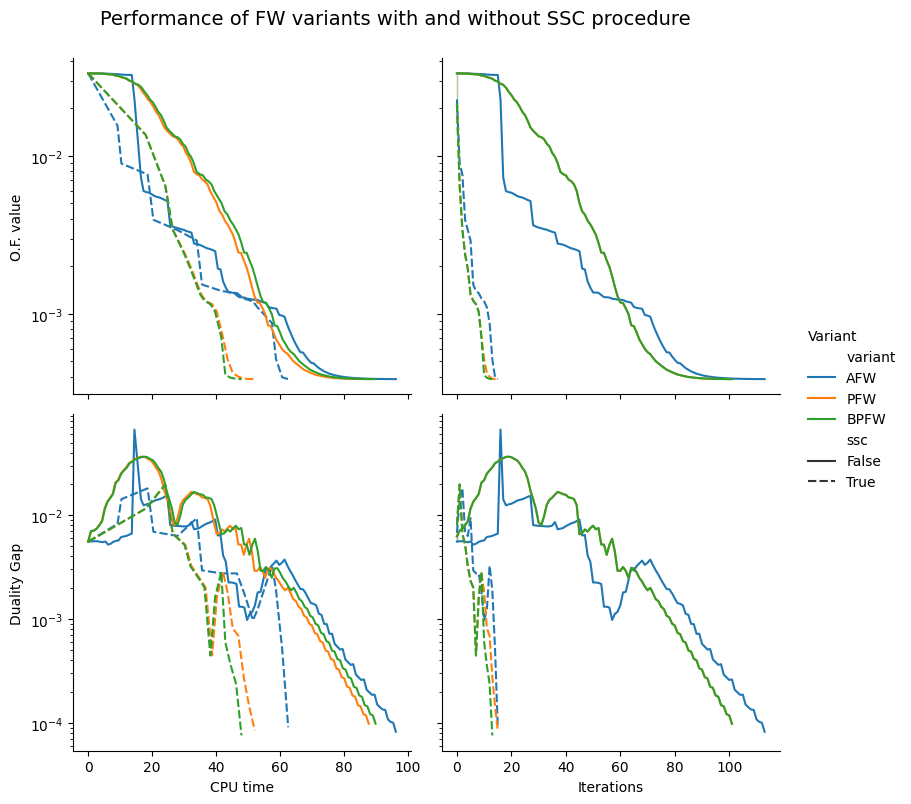

In [31]:
plot_hisotry(df, seed=1, ssc=True)

In [33]:
labels

['variant', 'AFW', 'PFW', 'BPFW', 'ssc', 'False', 'True']

In [34]:
handles

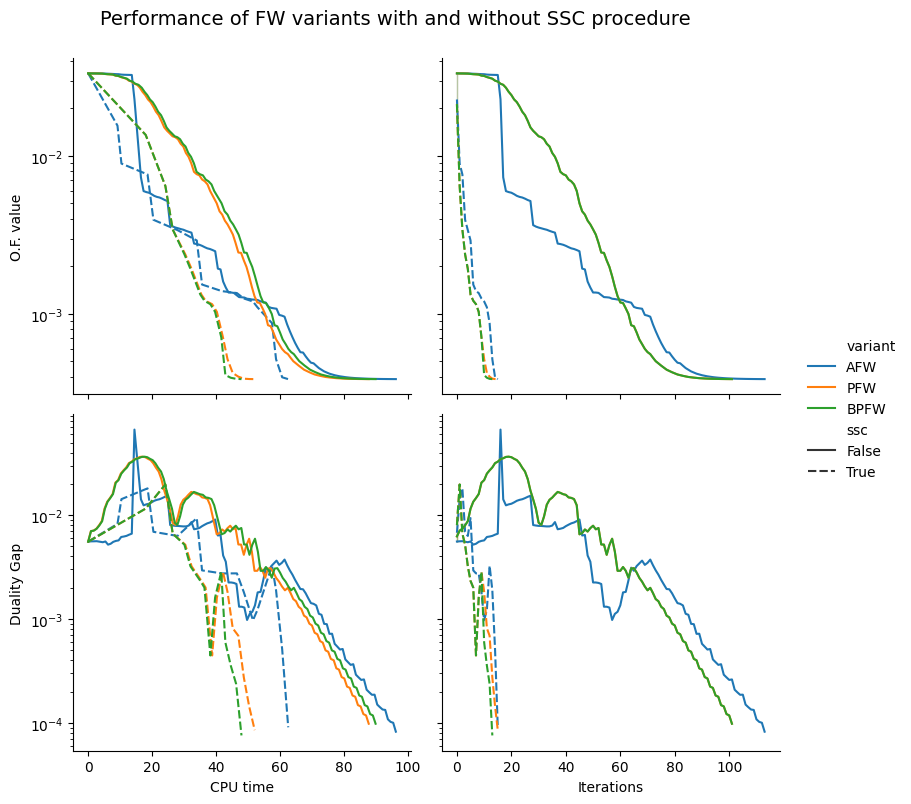

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex='col', sharey='row')
dfs = df[df.seed==1]
for i in range(2):
    for j in range(2):
        ax = axes[j, i]
        x = 'cpu_time' if i == 0 else 'iteration'
        y = 'of_value' if j == 0 else 'duality_gap'
        x_name = 'CPU time' if i == 0 else 'Iterations'
        y_name = 'O.F. value' if j == 0 else 'Duality Gap'
        sns.lineplot(data=dfs, x=x, y=y, hue='variant', style='ssc', ax=ax)
        ax.set_yscale('log')
        ax.spines[['right', 'top']].set_visible(False)
        handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
        ax.set_ylabel(y_name)
        ax.set_xlabel(x_name)

leg = fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1.0, 0.5), alignment='right', frameon=False)
fig.suptitle('Performance of FW variants with and without SSC procedure', fontsize=14, y=1)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()